# Perhitungan Information Gain Manual (Dataset BMI Kompleks)

Kita akan menggunakan dataset BMI yang terakhir kita buat, yang memiliki 15 data, 2 fitur (**Tinggi Badan**, **Berat Badan**), dan 2 kelas (**Gemuk**, **Ideal**). Dataset ini sengaja dibuat agar ada banyak tumpang tindih, sehingga pohon dipaksa untuk membuat banyak aturan (daun).

## Dataset yang Digunakan

| ID | Tinggi Badan (cm) | Berat Badan (kg) | Kategori BMI |
|----|-------------------|------------------|--------------|
| 1  | 160               | 55               | Ideal        |
| 2  | 162               | 70               | Gemuk        |
| 3  | 165               | 60               | Ideal        |
| 4  | 168               | 80               | Gemuk        |
| 5  | 170               | 65               | Ideal        |
| 6  | 172               | 70               | Ideal        |
| 7  | 175               | 85               | Gemuk        |
| 8  | 178               | 75               | Ideal        |
| 9  | 180               | 90               | Gemuk        |
| 10 | 182               | 80               | Ideal        |
| 11 | 161               | 75               | Gemuk        |
| 12 | 164               | 60               | Ideal        |
| 13 | 169               | 85               | Gemuk        |
| 14 | 173               | 70               | Ideal        |
| 15 | 176               | 90               | Gemuk        |

Total data: $$|S| = 15$$  
Jumlah Kelas Ideal: 8  
Jumlah Kelas Gemuk: 7

---

## Konsep Dasar

**Entropi (Entropy(S))**: Mengukur tingkat ketidakmurnian (atau "keragaman") dalam suatu kelompok data.

$$
Entropy(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
$$

Di mana $$p_i$$ adalah proporsi kelas ke-i dalam set data S, dan $$c$$ adalah jumlah kelas unik.

**Information Gain (Gain(S,A))**: Mengukur seberapa banyak ketidakmurnian (Entropi) yang berkurang ketika kita membagi set data S menggunakan atribut A.

$$
Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)
$$

---

## Langkah 1: Hitung Entropi Awal $$Entropy(S)$$

Distribusi Kategori BMI:  
- Ideal: 8 data  
- Gemuk: 7 data

Proporsi:

- $$ P(\text{Ideal}) = \frac{8}{15} \approx 0.5333 $$
- $$ P(\text{Gemuk}) = \frac{7}{15} \approx 0.4667 $$

$$
\begin{aligned}
Entropy(S) &= -\left( \frac{8}{15} \log_2 \frac{8}{15} \right) - \left( \frac{7}{15} \log_2 \frac{7}{15} \right) \\
&= -(0.5333 \times -0.907) - (0.4667 \times -1.096) \\
&= 0.484 + 0.511 \\
&\approx 0.995
\end{aligned}
$$

---

## Langkah 2: Hitung Information Gain untuk Setiap Fitur

Untuk fitur numerik, kita harus menemukan **threshold (nilai ambang batas)** terbaik yang memberikan Information Gain terbesar.

### a. Fitur **Tinggi Badan (cm)**

Ambil threshold: **170.5 cm**

**Subset 1**: Tinggi Badan ≤ 170.5 cm  
Data ID: 1, 2, 3, 4, 5, 11, 12, 13 (8 data)  
Distribusi: Ideal = 4, Gemuk = 4

$$
Entropy(S_{\leq 170.5}) = - (0.5 \log_2 0.5) - (0.5 \log_2 0.5) = 1.0
$$

**Subset 2**: Tinggi Badan > 170.5 cm  
Data ID: 6, 7, 8, 9, 10, 14, 15 (7 data)  
Distribusi: Ideal = 4, Gemuk = 3

$$
\begin{aligned}
Entropy(S_{> 170.5}) &= - (0.5714 \log_2 0.5714) - (0.4286 \log_2 0.4286) \\
&= - (0.5714 \times -0.807) - (0.4286 \times -1.222) \\
&= 0.461 + 0.524 \\
&\approx 0.985
\end{aligned}
$$

**Information Gain (Tinggi Badan ≤ 170.5 cm):**

$$
\begin{aligned}
Gain(S, \text{Tinggi Badan}) &= 0.995 - \left( \frac{8}{15} \times 1.0 + \frac{7}{15} \times 0.985 \right) \\
&= 0.995 - (0.5333 + 0.4597) \\
&= 0.995 - 0.993 \\
&\approx 0.002
\end{aligned}
$$

**Catatan**: Gain rendah → pemisahan ini kurang baik.

---

### b. Fitur **Berat Badan (kg)**

Ambil threshold: **72.5 kg**

**Subset 1**: Berat Badan ≤ 72.5 kg  
      Data ID Ideal: 1, 3, 5, 6, 8, 10, 12, 14  
      Data ID Gemuk: 2  
      Total = 9 data, Ideal = 8, Gemuk = 1

$$
\begin{aligned}
Entropy(S_{\leq 72.5}) &= - (0.8889 \log_2 0.8889) - (0.1111 \log_2 0.1111) \\
&= 0.149 + 0.352 \\
&\approx 0.501
\end{aligned}
$$

**Subset 2**: Berat Badan > 72.5 kg  
    Data ID: 4, 7, 9, 11, 13, 15 (semua Gemuk)

$$
Entropy(S_{>72.5}) = - (1 \log_2 1) = 0.0
$$

**Information Gain (Berat Badan ≤ 72.5 kg):**

$$
\begin{aligned}
Gain(S, \text{Berat Badan}) &= 0.995 - \left( \frac{9}{15} \times 0.501 + \frac{6}{15} \times 0 \right) \\
&= 0.995 - (0.6 \times 0.501) \\
&= 0.995 - 0.3006 \\
&\approx 0.6944
\end{aligned}
$$

---

### Kesimpulan

- Information Gain terbesar didapat dari atribut **Berat Badan** dengan threshold **72.5 kg**.
- Ini artinya atribut ini lebih baik digunakan sebagai node pertama dalam membangun pohon keputusan.


--- Dataset BMI yang Lebih Kompleks ---
    Tinggi Badan (cm)  Berat Badan (kg) Kategori BMI
0                 160                55        Ideal
1                 162                70        Gemuk
2                 165                60        Ideal
3                 168                80        Gemuk
4                 170                65        Ideal
5                 172                70        Ideal
6                 175                85        Gemuk
7                 178                75        Ideal
8                 180                90        Gemuk
9                 182                80        Ideal
10                161                75        Gemuk
11                164                60        Ideal
12                169                85        Gemuk
13                173                70        Ideal
14                176                90        Gemuk
----------------------------------------
Model Decision Tree berhasil dilatih dengan dataset BMI yang lebih komp

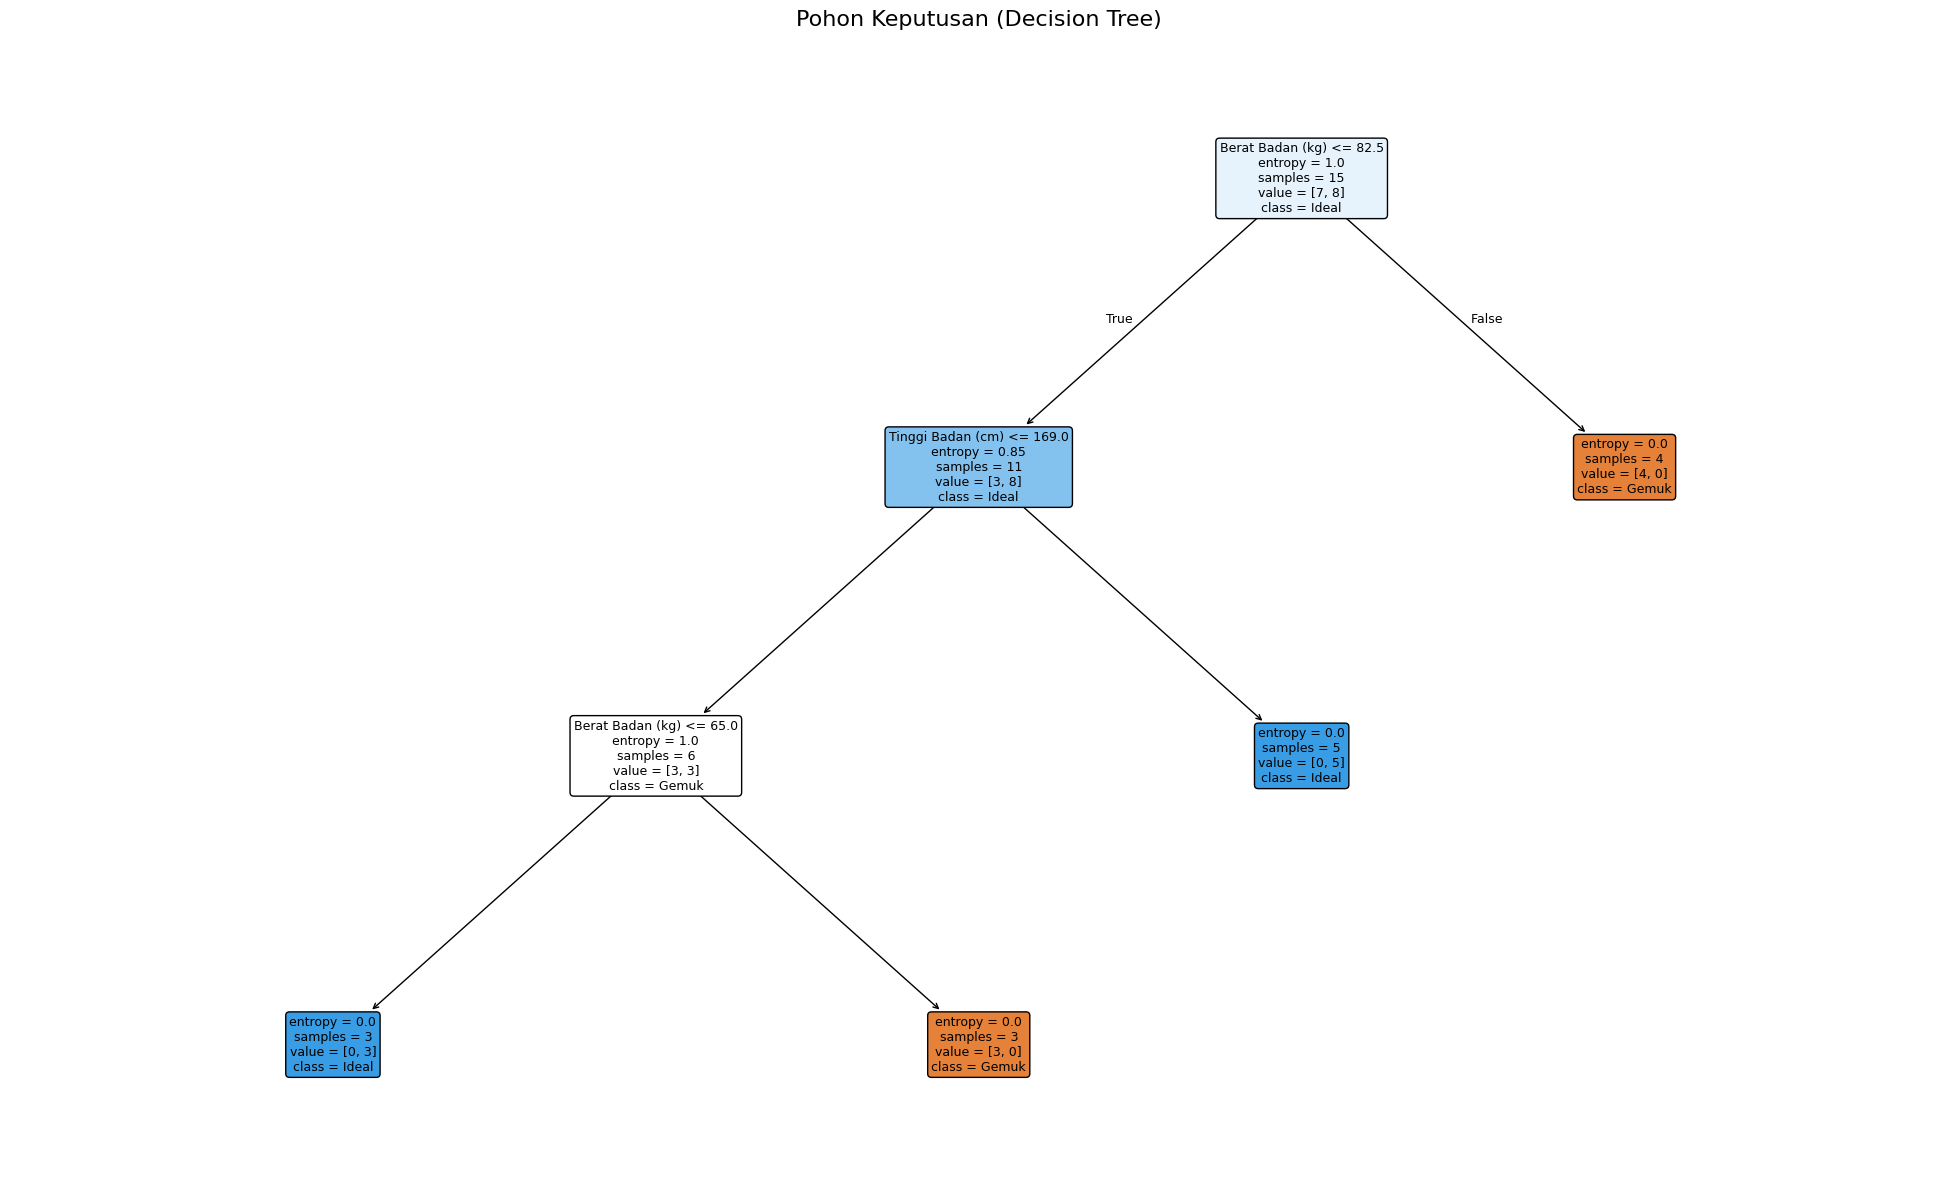

--- Aturan Pohon Keputusan (IF-THEN-ELSE) dari Sklearn ---
IF Berat Badan (kg) <= 82.50:
  IF Berat Badan (kg) <= 82.50 AND Tinggi Badan (cm) <= 169.00:
    IF Berat Badan (kg) <= 82.50 AND Tinggi Badan (cm) <= 169.00 AND Berat Badan (kg) <= 65.00:
      THEN Kategori BMI = Ideal (Sampel: Gemuk: 0, Ideal: 1)
    IF Berat Badan (kg) <= 82.50 AND Tinggi Badan (cm) <= 169.00 AND Berat Badan (kg) > 65.00:
      THEN Kategori BMI = Gemuk (Sampel: Gemuk: 1, Ideal: 0)
  IF Berat Badan (kg) <= 82.50 AND Tinggi Badan (cm) > 169.00:
    THEN Kategori BMI = Ideal (Sampel: Gemuk: 0, Ideal: 1)
IF Berat Badan (kg) > 82.50:
  THEN Kategori BMI = Gemuk (Sampel: Gemuk: 1, Ideal: 0)
----------------------------------------


In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# --- 1. Dataset BMI yang Sangat Dimodifikasi (untuk memaksa banyak daun) ---
data_bmi_complex = {
    'Tinggi Badan (cm)': [
        160, 162, 165, 168, 170, # Tinggi Menengah-Rendah
        172, 175, 178, 180, 182, # Tinggi Menengah-Tinggi
        161, 164, 169, 173, 176  # Campuran untuk ambiguitas
    ],
    'Berat Badan (kg)': [
        55, 70, 60, 80, 65,  # Ideal, Gemuk, Ideal, Gemuk, Ideal (di tinggi rendah-menengah)
        70, 85, 75, 90, 80,  # Ideal, Gemuk, Ideal, Gemuk, Ideal (di tinggi menengah-tinggi)
        75, 60, 85, 70, 90   # Gemuk, Ideal, Gemuk, Ideal, Gemuk (lebih banyak ambiguitas)
    ],
    'Kategori BMI': [
        'Ideal', 'Gemuk', 'Ideal', 'Gemuk', 'Ideal',
        'Ideal', 'Gemuk', 'Ideal', 'Gemuk', 'Ideal',
        'Gemuk', 'Ideal', 'Gemuk', 'Ideal', 'Gemuk'
    ]
}
df = pd.DataFrame(data_bmi_complex)

# Periksa jumlah data (harus 15)
if len(df) != 15:
    print(f"Peringatan: Jumlah data bukan 15. Saat ini {len(df)} data.")

print("--- Dataset BMI yang Lebih Kompleks ---")
print(df)
print("-" * 40)

# --- 2. Memisahkan Fitur (X) dan Target (y) ---
X = df[['Tinggi Badan (cm)', 'Berat Badan (kg)']]
y = df['Kategori BMI']

# --- 3. Preprocessing (passthrough) ---
preprocessor = ColumnTransformer(
    transformers=[],
    remainder='passthrough'
)

# --- 4. Encoding Kelas Target ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

# --- 5. Membuat Pipeline dan Melatih Model Decision Tree ---
# Menggunakan criterion='entropy' dan **menambahkan max_depth=3**
# Ini akan membatasi pertumbuhan pohon dan membuat panah tampak lebih pendek.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3)) # Batasi kedalaman
])

model_pipeline.fit(X, y_encoded)

print("Model Decision Tree berhasil dilatih dengan dataset BMI yang lebih kompleks (max_depth=3)!")
print("-" * 40)

# --- 6. Mendapatkan Nama Fitur Setelah Preprocessing ---
all_feature_names = X.columns.tolist()

# --- 7. Visualisasi Pohon Keputusan (Dengan max_depth Terbatas) ---
# Ukuran figsize dapat disesuaikan lebih lanjut jika perlu.
plt.figure(figsize=(25, 15)) # Ukuran plot disesuaikan untuk pohon yang lebih dangkal
plot_tree(
    model_pipeline.named_steps['classifier'],
    feature_names=all_feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=9, # Sesuaikan fontsize jika diperlukan
    precision=2
)
plt.title("Pohon Keputusan (Decision Tree)", fontsize=16)
plt.show()

# --- 8. Ekstraksi dan Tampilkan Aturan (Rules) ---
tree_model = model_pipeline.named_steps['classifier']
n_nodes = tree_model.tree_.node_count
children_left = tree_model.tree_.children_left
children_right = tree_model.tree_.children_right
feature = tree_model.tree_.feature
threshold = tree_model.tree_.threshold
value = tree_model.tree_.value
is_leaf = tree_model.tree_.children_left == -1

print("--- Aturan Pohon Keputusan (IF-THEN-ELSE) dari Sklearn ---")

def print_sklearn_rules(node_id, depth, path_condition=""):
    indent = "  " * depth

    if is_leaf[node_id]:
        class_counts = value[node_id][0].astype(int)
        predicted_class_idx = class_counts.argmax()
        predicted_class_name = class_names[predicted_class_idx]
        sample_info = []
        for i, count in enumerate(class_counts):
            sample_info.append(f"{class_names[i]}: {count}")
        print(f"{indent}THEN Kategori BMI = {predicted_class_name} (Sampel: {', '.join(sample_info)})")
        return

    feature_index = feature[node_id]
    feature_name = all_feature_names[feature_index]
    split_threshold = threshold[node_id]

    left_condition = f"{feature_name} <= {split_threshold:.2f}"
    new_left_path = f"{path_condition} AND {left_condition}" if path_condition else f"IF {left_condition}"
    print(f"{indent}{new_left_path}:")
    print_sklearn_rules(children_left[node_id], depth + 1, new_left_path)

    right_condition = f"{feature_name} > {split_threshold:.2f}"
    new_right_path = f"{path_condition} AND {right_condition}" if path_condition else f"IF {right_condition}"
    print(f"{indent}{new_right_path}:")
    print_sklearn_rules(children_right[node_id], depth + 1, new_right_path)

print_sklearn_rules(0, 0)
print("-" * 40)

## Menambah 2 data baru

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


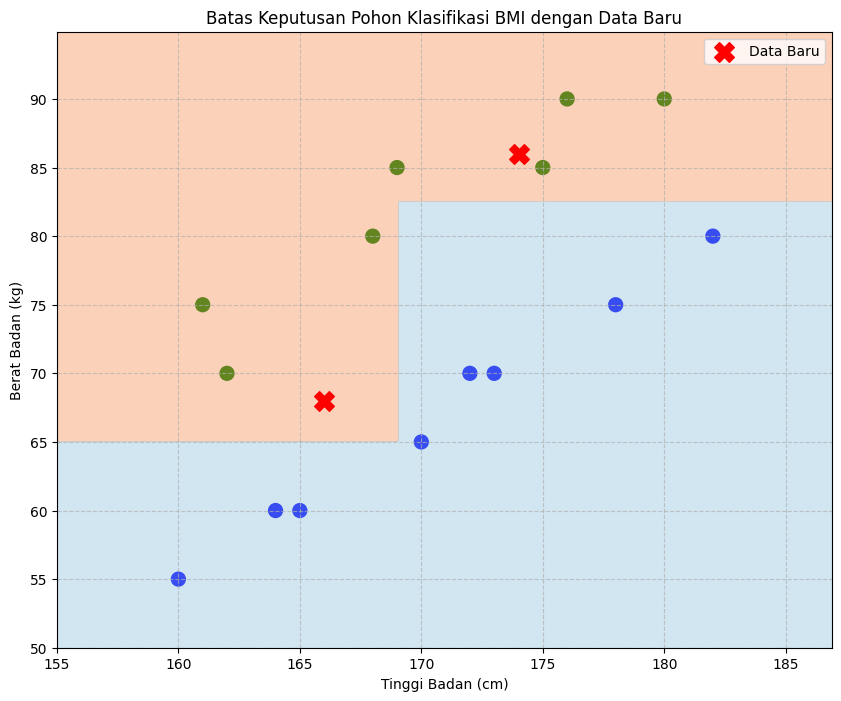

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Dataset BMI yang Lebih Kompleks (15 data asli)
data_bmi_complex = {
    'Tinggi Badan (cm)': [
        160, 162, 165, 168, 170,
        172, 175, 178, 180, 182,
        161, 164, 169, 173, 176
    ],
    'Berat Badan (kg)': [
        55, 70, 60, 80, 65,
        70, 85, 75, 90, 80,
        75, 60, 85, 70, 90
    ],
    'Kategori BMI': [
        'Ideal', 'Gemuk', 'Ideal', 'Gemuk', 'Ideal',
        'Ideal', 'Gemuk', 'Ideal', 'Gemuk', 'Ideal',
        'Gemuk', 'Ideal', 'Gemuk', 'Ideal', 'Gemuk'
    ]
}
df_train = pd.DataFrame(data_bmi_complex)

# Memisahkan Fitur (X) dan Target (y) untuk Pelatihan
X_train = df_train[['Tinggi Badan (cm)', 'Berat Badan (kg)']]
y_train = df_train['Kategori BMI']

# Encoding Kelas Target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
class_names = label_encoder.classes_

# Melatih Model Decision Tree
model = DecisionTreeClassifier(random_state=42, criterion='entropy')
model.fit(X_train, y_train_encoded)

# 2 Data Baru untuk Pengujian
new_data = pd.DataFrame({
    'Tinggi Badan (cm)': [166, 174],
    'Berat Badan (kg)': [68, 86]
})

# --- Plot Batas Keputusan dengan Titik Data Baru ---
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot data pelatihan
colors = ['blue' if c == 'Ideal' else 'green' for c in y_train]
ax.scatter(X_train['Tinggi Badan (cm)'], X_train['Berat Badan (kg)'], c=colors, s=100, )

# Plot 2 data baru
ax.scatter(new_data['Tinggi Badan (cm)'], new_data['Berat Badan (kg)'], color='red', marker='X', s=200, label='Data Baru', zorder=5)

# Membuat meshgrid untuk plot batas keputusan
x_min, x_max = X_train['Tinggi Badan (cm)'].min() - 5, X_train['Tinggi Badan (cm)'].max() + 5
y_min, y_max = X_train['Berat Badan (kg)'].min() - 5, X_train['Berat Badan (kg)'].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prediksi di setiap titik meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot batas keputusan
ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu, levels=len(class_names)-1)

plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.title('Batas Keputusan Pohon Klasifikasi BMI dengan Data Baru')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()